## Machine Learning Project : 


### 1. Business Problem : Predicting the Energy Star Score of a building:

### 1.1  Description :
           
The NYC Benchmarking Law requires owners of large buildings to annually measure their energy and water consumption in a process called benchmarking. The law standardizes this process by requiring building owners to enter their annual energy and water use in the U.S. Environmental Protection Agency's (EPA) online tool, ENERGY STAR Portfolio Manager and use the tool to submit data to the City. This data informs building owners about a building's energy and water consumption compared to similar buildings, and tracks progress year over year to help in energy efficiency planning.

### 1.2 objective:
The objective that we are proposing here to achive is to use the energy data to build a model that can predict the Energy Star Score of a building(Residentail and Non Residentail spaces) and interpret the results to find the factors which influence the score or the predictions.

### 1.3 Source/Useful Links:
1. https://www1.nyc.gov/html/gbee/html/plan/ll84.shtml

2. http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf


### 1.4  Machine Learning constraints:
1. Interpretability of the results is important.
2. Feature importance of the data-point belonging to each class is needed to make the models more interpretable
           
           
           
           

### 2. Machine Learning Problem Formulation :

The Workflow that we will use here are as follows as guided in the assignemnt email.

1. Exploratory data analysis.
2. Data cleaning.
3. Feature engineering.
4. Feature selection.
5. Making baseline Model.
6. Use Different Machine Laerning Models to check for better performance.
5. Hyperparameter tuning the hyperparametres of different models.
6. Fiding the Best Machine learning model which best suits for the problem statement.
7. Interpret the model results and reasoning for using the model.
8. Conclusion.
9. Final report for presentation.

### 2.1 Data Overview and Data Cleaning 

In [4]:
#  Importing some libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# reading the dataset as a dataframe for this we will use  pandas 
# as we are having the dataset as an Excel file so we will use the read_csv function in pandas 

# https://pandas.pydata.org/


"""
The details about the columns in the dataste can be found in the PDF below  : 

http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf

"""

data = pd.read_csv("energydata.csv")
data.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [16]:
print("The Coloumns in the dataset are as follows", data.columns , end= "/n", sep = " ")

The Coloumns in the dataset are as follows Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Nor

### Description of the Columns in the dataset :

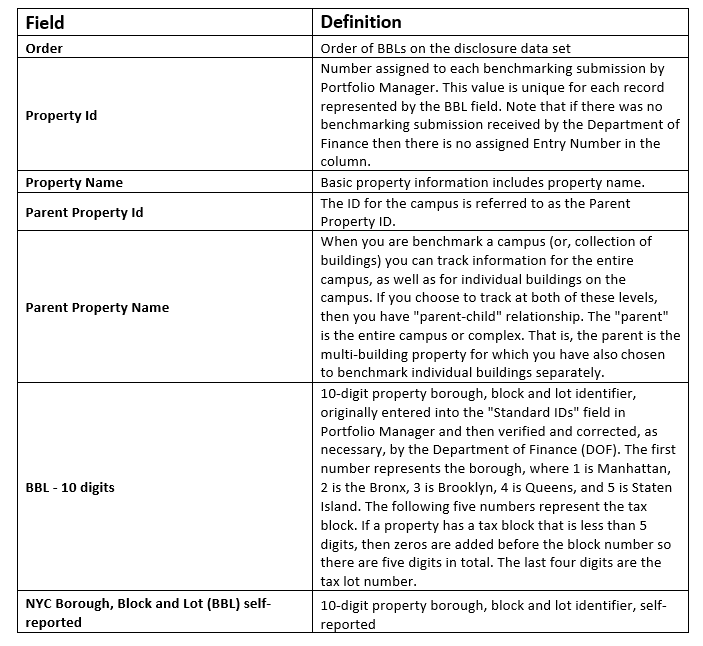

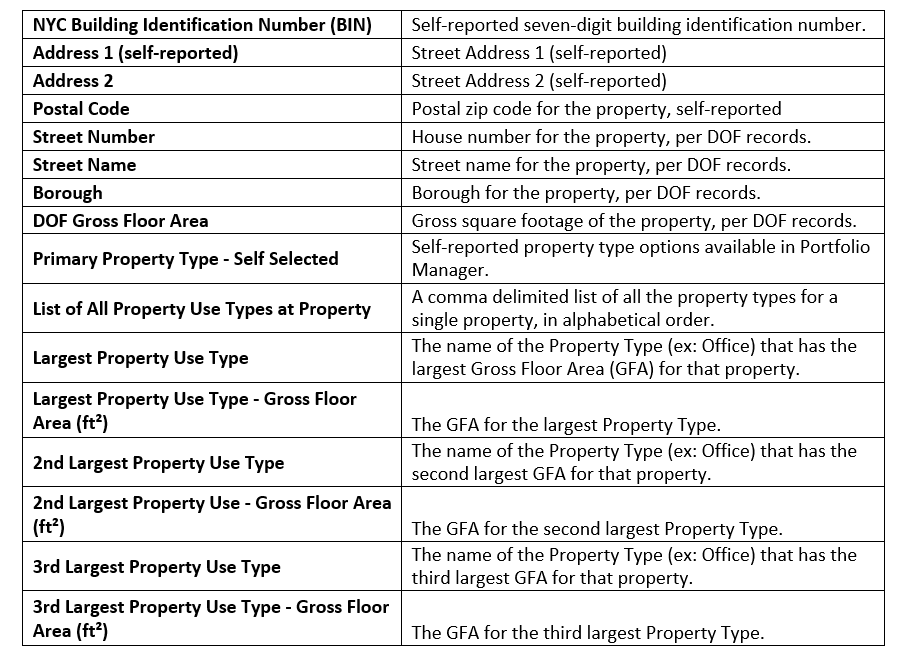

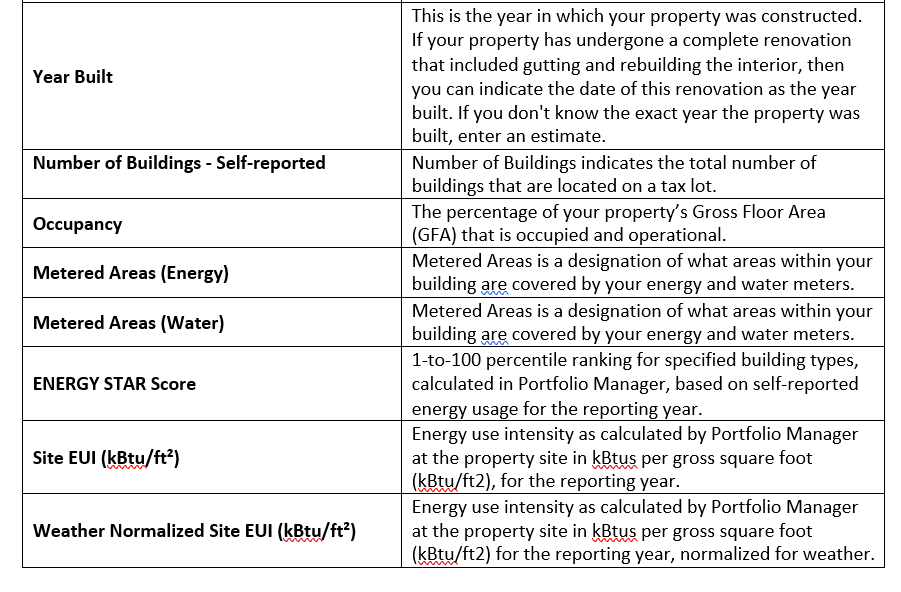

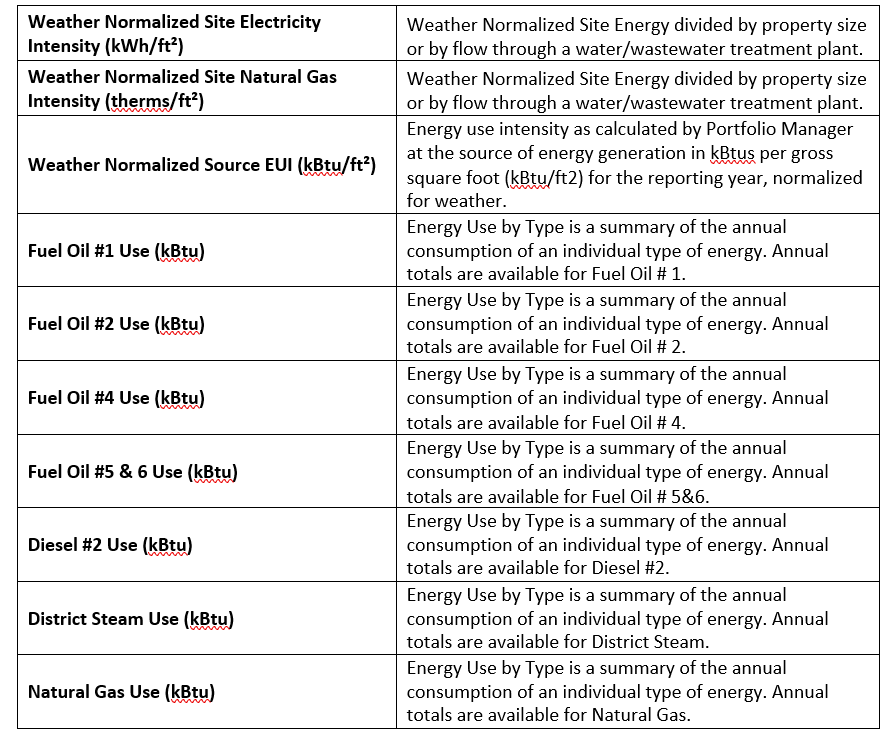

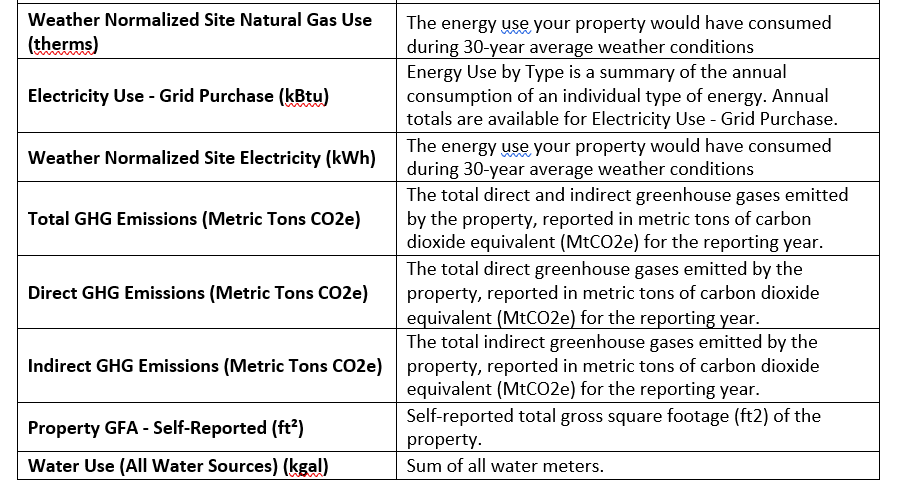

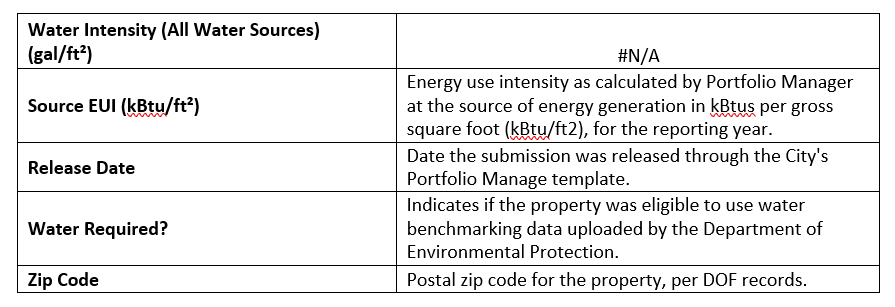

In [21]:
# some basic information about the dataset. 

print("The Number of Columns in the dataste is " , data.shape[1])
print("*"*100)

print("The number of datapoints in the dataset are :" ,data.shape[0])

The Number of Columns in the dataste is  60
****************************************************************************************************
The number of datapoints in the dataset are : 11746


In [27]:
# checking the basic stats of the dataset : 

"""
The describe function in pandas can be used to get the basic stats of the data , we can have a look on this and have a 
1000 feet overview of the distribution of the data , the mean and the standard devation of the numnerical data . 

"""

print(data.describe())

              Order   Property Id  DOF Gross Floor Area    Year Built  \
count  11746.000000  1.174600e+04          1.162800e+04  11746.000000   
mean    7185.759578  3.642958e+06          1.732695e+05   1948.738379   
std     4323.859984  1.049070e+06          3.367055e+05     30.576386   
min        1.000000  7.365000e+03          5.002800e+04   1600.000000   
25%     3428.250000  2.747222e+06          6.524000e+04   1927.000000   
50%     6986.500000  3.236404e+06          9.313850e+04   1941.000000   
75%    11054.500000  4.409092e+06          1.596140e+05   1966.000000   
max    14993.000000  5.991312e+06          1.354011e+07   2019.000000   

       Number of Buildings - Self-reported     Occupancy  \
count                         11746.000000  11746.000000   
mean                              1.289971     98.762557   
std                               4.017484      7.501603   
min                               0.000000      0.000000   
25%                               1.000000

In [30]:
# checking for missing values in the dataset : 

#  refrence : https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

"""
This shows that we are having NON or missing values in the dataset.

"""

print(data.isnull().any().any())

True


In [32]:
# checking data types of the coloumns 

"""
Below output shows the datatypes of the values in the data and the Column showing Non-Null Count as NON-Null becasue 
as we saw in the data.head the missing values are represented as " Not Available ", and the usually we represent it as the 
numpy.nan values or NAN(Not an number) , so pandas will read it as object data type as " Not Available " is a string.
therefor we have to convert it into the float point number orelse we cannot perform the perations on it , it will through an
error as cannot convert into interger or float or casting error . 


"""
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [33]:
"""
converting the values into a numpy varibale as NP.NAN

ref:https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value

"""
data = data.replace({'Not Available': np.nan})

In [35]:
# now we have converted the Not Available as NP.Nan .
data.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [49]:
"""
Now lets convert the datatypes of Object(string) to folat for only for the numerical values.

the reason for it is as we are also having some categorical values which are strings we need to manually find out and 
change the values into folat or integers. 

the blow code is to show all the data_types that belong to objects(string in pandas)

"""
data_1 = []
for column in data:
    data_type = data[column].dtype
    if data_type == object:
        data_1.append(column)
print(data_1)

['Property Name', 'Parent Property Id', 'Parent Property Name', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported', 'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)', 'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough', 'Primary Property Type - Self Selected', 'List of All Property Use Types at Property', 'Largest Property Use Type', 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBt

In [50]:
"""

Now we have to manually check the columns which has the Numerical valeus and then assign them as float datatype.

** Please notice we are only converting the values which has some kind of quantification into it like Feet or Gallan.

ref:https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas
https://stackoverflow.com/questions/25952790/convert-pandas-series-from-dtype-object-to-float-and-errors-to-nans
https://wellsr.com/python/python-convert-pandas-dataframe-string-to-float-int/


"""


for col in data_1:
    if ('therms' in col or 'Score' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'ft²' in col or 'gal' in col or 'kBtu' in col):
        data[col] = data[col].astype(float)

In [60]:
"""
Done with the basic data type conversion now lets jump into finding the missing values in the dataste . 


ref: https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

ref : https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

the code below shows all the columns that are having the Null values and their corrosponding counts 

"""


print(data.isnull().sum())

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

In [86]:
# percentage of the missing values in the dataset
percentage_of_missing_values = data.isnull().sum()  * 100  / len(data)

# sorting the pandas series 

percentage_of_missing_values = percentage_of_missing_values.sort_values(ascending=False)
print(percentage_of_missing_values)

Fuel Oil #1 Use (kBtu)                                        99.923378
Diesel #2 Use (kBtu)                                          99.863783
Address 2                                                     98.237698
Fuel Oil #5 & 6 Use (kBtu)                                    94.942959
District Steam Use (kBtu)                                     92.031330
Fuel Oil #4 Use (kBtu)                                        88.753618
3rd Largest Property Use Type - Gross Floor Area (ft²)        87.365912
3rd Largest Property Use Type                                 87.365912
Fuel Oil #2 Use (kBtu)                                        78.026562
2nd Largest Property Use Type                                 68.150860
2nd Largest Property Use - Gross Floor Area (ft²)             68.150860
Metered Areas  (Water)                                        39.238890
Water Intensity (All Water Sources) (gal/ft²)                 33.917930
Water Use (All Water Sources) (kgal)                          33

In [104]:
"""

We will drop all the values that have the missng values percentage grater than 50% .

Droping data is not a good idea but we have to do it becasue we cannot impute values randomely to the dataset . 

there are ways around it to make a independent model for predicting the values then we can impute it , fro categorical values
we can impute the most commenly occuring values but it involves a lots of manual work to be done . 

lets see how the model perfroms and then if the performance is really low then we can use these features my manually 
encapulaiting the values, but for it need considerable amout of time for research and domain knowledge for impuataion. 

"""

missing_val = data.isnull().sum()
missing_val_percent = 100 * data.isnull().sum() / len(data)       
mis_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : 'percentage of Total Values'})
missing_data_frame = mis_val_table_ren_columns
missing_columns = list(missing_data_frame[missing_data_frame['percentage of Total Values'] > 50].index)


# https://www.geeksforgeeks.org/creating-a-dataframe-from-pandas-series/
# https://www.geeksforgeeks.org/python-delete-rows-columns-from-dataframe-using-pandas-drop/



data = data.drop(columns = list(missing_columns))

In [110]:
print('shape of the data after we remove the columns for missing values ' , data.columns.shape)

shape of the data after we remove the columns for missing values  (49,)


In [111]:
#  saving the clean dataset as a CSV file for further processing ! 


data.to_csv('preprocessed.csv', index = False)



In [113]:
"""

checking if the CSV is saved properly sometimes we have to use the different encodings for it . 

ref: https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file


"""

sujit =  pd.read_csv("preprocessed.csv")
sujit.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
